# Exercise: Build multiple models
For this exercise, you will perform a multiple linear regression on the social media dataset. We already saw a simple linear regression example where we regressed number of Facebook friends on number of groups. In this new dataset, a couple of variables are added. So let's first have a look at our data before building a multiple linear regression model. After the data exploration, it is up to you to test the assumptions and to select the best linear regression model. 


## Data exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Read in the data 
social_media = pd.read_csv("social_media_2.csv")
social_media.head(n=10)

,LOR,NBRlikes,NBRgroups,NBRmusic,NBRcheckins,NBRmovies,NBRlinks,NBRfriends,female
0,454.542650,2,9,5,0,1,0,280,1
1,27.638287,4,6,0,0,4,0,104,1
2,126.946725,17,24,129,0,79,0,1307,1
3,208.484745,1,4,11,0,3,0,269,0
4,718.958299,1,9,3,0,0,0,437,1
5,12.650775,5,22,46,0,7,1,677,1
6,19.378935,26,0,2,0,3,0,74,0
7,1266.304537,1,3,2,0,0,0,63,0
8,370.591134,0,21,3,0,0,0,576,0
9,596.102049,61,10,4,0,3,0,2780,1


There are 9 columns in total:
- LOR: length of relationship, tells us how long somebody is on Facebook (expressed in weeks)
- NBRlikes: the total number of likes a user has given to Facebook pages
- NBRgroups: the number of groups that a user is part of
- NBRcheckins: the number of times a user has shared a check-in to a particular location
- NBRmovies: the number of movies a user has liked
- NBRlinks: the number of links a user has posted
- NBRfriends: the dependent variable expressing a user's network size
- female: indicate whether the user is female (1) or male (0) 

Let's have a closer look at what the data looks like.

In [2]:
#We will describe the data to have a look at the most important summary statistics
pd.set_option('precision', 2)
print(social_media.describe())

           LOR  NBRlikes  NBRgroups  NBRmusic  NBRcheckins  NBRmovies  \
count   200.00    200.00     200.00    200.00       200.00     200.00   
mean    293.97      8.13       8.24     15.12         0.03       6.50   
std     242.87     19.12      14.14     34.95         0.21      13.70   
min       0.08      0.00       0.00      0.00         0.00       0.00   
25%      96.50      1.00       1.00      0.00         0.00       0.00   
50%     250.48      2.00       4.00      3.00         0.00       2.50   
75%     416.00      4.00      10.25     11.00         0.00       5.25   
max    1267.02    130.00     149.00    235.00         2.00      84.00   

       NBRlinks  NBRfriends  female  
count    200.00      200.00  200.00  
mean       1.02      248.44    0.45  
std        3.60      312.14    0.50  
min        0.00        0.00    0.00  
25%        0.00       47.25    0.00  
50%        0.00      163.50    0.00  
75%        0.00      325.50    1.00  
max       22.00     2780.00    1.00  


Now it is up to you to test the most important assumptions: **linear relationships, multivariate normality** and **multicollinearity.** To do so, you should make a scatter plot and a histogram and look at the correlations. What conclusions can you make based on these analyses? 

After testing the assumptions, you should perform some variables transformations and/or delete some variables to get your final basetable. With this final basetable, you can start the modelling phase.

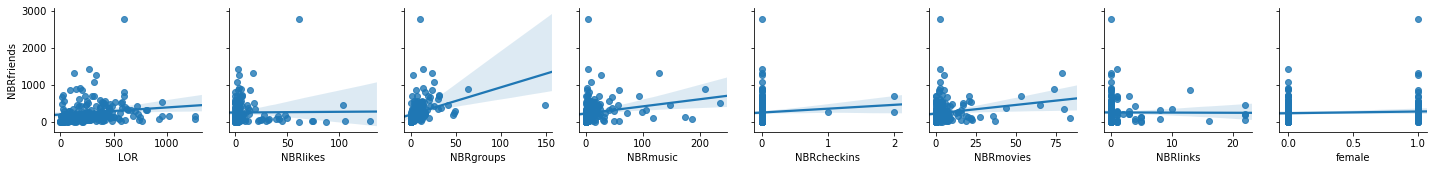

In [3]:
import seaborn as sea 

data= social_media
y_vars = ["NBRfriends"]
x_vars = ['LOR', 'NBRlikes', 'NBRgroups', 'NBRmusic', 'NBRcheckins', 'NBRmovies','NBRlinks', 'female']
plot = sea.pairplot(data = data, y_vars = y_vars, x_vars = x_vars,kind = 'reg')

plt.show()

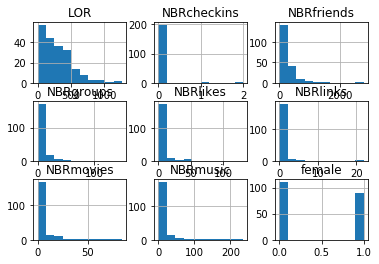

In [4]:
#Make histograms for multivariate normality
social_media.hist()
plt.show()

In [5]:
#To test for multicollinearity, we will make a correlation matrix
correlation = social_media.corr(method='pearson')
correlation

,LOR,NBRlikes,NBRgroups,NBRmusic,NBRcheckins,NBRmovies,NBRlinks,NBRfriends,female
LOR,1.00,-0.13,1.51e-02,0.05,-3.79e-02,-1.48e-02,-4.03e-02,1.49e-01,8.11e-02
NBRlikes,-0.13,1.00,1.91e-01,0.22,-4.81e-02,2.91e-01,1.58e-01,1.15e-02,8.03e-02
NBRgroups,0.02,0.19,1.00e+00,0.38,2.99e-03,4.69e-01,7.97e-02,3.37e-01,-8.59e-03
NBRmusic,0.05,0.22,3.81e-01,1.00,-1.61e-02,6.63e-01,-3.29e-02,2.18e-01,5.94e-02
NBRcheckins,-0.04,-0.05,2.99e-03,-0.02,1.00e+00,-4.60e-02,-2.71e-02,7.07e-02,-1.07e-01
NBRmovies,-0.01,0.29,4.69e-01,0.66,-4.60e-02,1.00e+00,-1.94e-02,2.06e-01,9.89e-03
NBRlinks,-0.04,0.16,7.97e-02,-0.03,-2.71e-02,-1.94e-02,1.00e+00,-5.51e-03,-2.18e-02
NBRfriends,0.15,0.01,3.37e-01,0.22,7.07e-02,2.06e-01,-5.51e-03,1.00e+00,7.35e-02
female,0.08,0.08,-8.59e-03,0.06,-1.07e-01,9.89e-03,-2.18e-02,7.35e-02,1.00e+00


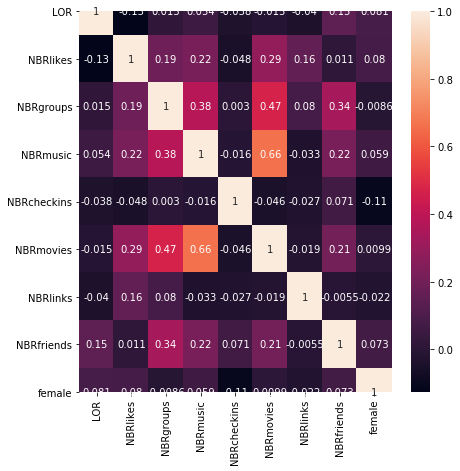

In [6]:
#To test for multicollinearity, a correlation map can make things more clear
import seaborn as sea

heatmap = sea.heatmap(social_media.corr(), cbar=True, annot=True, 
                      yticklabels=social_media.columns.values, xticklabels=social_media.columns.values)
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

Before continuing, take the log of NBRfriends, NBRgroups, NBRmovies, NBRlikes, NBRmusic, LOR and see what changes in the analysis.

In [7]:
#Take the log of NBRfriends, NBRgroups, NBRmovies, NBRlikes, NBRmusic, LOR
#Hint: take log1p, which is the natural logarithm + 1 to make sure that zeros don't produce NaN values.
def take_log(data, columns):
    
    #the columns argument should contain all the columns that you want to transform with log1p
    #You should return a dataframe with the desired columns logged and the remaining columns unchanged
    
    data_log = data.copy()
    ### BEGIN SOLUTION
    
    for col in columns:
        data_log[col] = np.log1p(data_log[col])
    ### END SOLUTION 
    
    return data_log

social_media_log = take_log(data=social_media,columns=['NBRfriends', 'NBRgroups', 'NBRmovies', 
                                                       'NBRlikes', 'NBRmusic', 'LOR'])
social_media_log.head(1)

,LOR,NBRlikes,NBRgroups,NBRmusic,NBRcheckins,NBRmovies,NBRlinks,NBRfriends,female
0,6.12,1.1,2.3,1.79,0,0.69,0,5.64,1


Verify your solution:

In [8]:
assert np.round(social_media_log.NBRfriends[0],2) == 5.64
assert np.round(social_media_log.NBRgroups[0],2) == 2.30
assert np.round(social_media_log.NBRmovies[0],2) == 0.69
assert np.round(social_media_log.NBRlikes[0],2) == 1.10
assert np.round(social_media_log.NBRmusic[0],2) == 1.79
assert np.round(social_media_log.LOR[0],2) == 6.12

Now, you can make the pair plot again and the correlation heat map. You will notice that the there is a high correlation between number movies and number of music. Therefore, we will delete the number of movies variable.

In [9]:
#Drop number of movies
social_media_log = social_media_log.drop('NBRmovies', axis=1)

## Model selection with approximation

Now that you have the final basetable, you can start the modelling phase. It is up to you to select the best model. 

You should build several OLS models (using the *statsmodel* package) in which you include different predictors explaining the number of friends on Facebook. For example, you can include a full model (where you include all predictors), a null model (where you include no predictors), and simple linear regression model. Evaluate your models using the AIC, BIC and adjusted R-squared. 

In [10]:
np.random.seed(40) 

def calculate_approximation(data,columns):
    #This function will calculate approximation measures (AIC, BIC, adjusted Rsq)
    #The columns parameter determines which variables are considered in the model
    #You should return the AIC, BIC and adj Rsq values
    
    ### BEGIN SOLUTION
    import statsmodels.api as sm

    data = sm.add_constant(data)

    lm = sm.OLS(data["NBRfriends"],data[columns]).fit()
    
    measures = (lm.aic, lm.bic, lm.rsquared_adj)
    ### END SOLUTION
    
    return measures

Verify you results:

In [11]:
assert np.allclose(calculate_approximation(data=social_media_log,
                       columns = ['const','LOR', 'NBRgroups', 
                                 'NBRmusic','female']),(616.96181973426951, 633.45340656700967, 0.55823475386753474)) 

assert np.allclose(calculate_approximation(data=social_media_log,
                       columns = ['const','LOR']),(731.94436129573842, 738.54099602883446, 0.20334328916931421)) 

assert np.allclose(calculate_approximation(data=social_media_log,
                       columns = ['const','NBRgroups']),(641.993574665, 648.590209398,0.491904243857))

assert np.allclose(calculate_approximation(data=social_media_log,
                       columns = ['const', 'LOR', 'NBRgroups', 'NBRmusic','female']),(616.961819734, 633.453406567,0.558234753868)) 

assert np.allclose(calculate_approximation(data=social_media_log,
                       columns = ['const', 'LOR', 'NBRgroups','female']),(617.571702521, 630.764971987 ,0.554715707868))

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


You can test several other models besides the ones tested above. You can do this as an extra exercise To make sure that the best model found by the approximation measures is really the best. 

## Model selection with cross-validation

Now, you should perform cross-validation to select the best model. Use 10-fold cross-validation and use the RMSE, MAE and R-squared as evaluation measures. You will now use the *scikit-learn* to build the 10-fold cross-validated models. 

In [12]:
np.random.seed(40) 

def calculate_performance(X, y, nFold):    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import make_pipeline
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import r2_score as r2
    from math import sqrt
    
    #Return RMSE, MAE, adj R-sq (in that order!)
    
    ### BEGIN SOLUTION
    predictions = cross_val_predict(LinearRegression(), X, y, cv=nFold)
    
    RMSE = sqrt(mse(y, predictions))
    MAE = mae(y, predictions)
    R2 = r2(y, predictions)
    
    measures = (RMSE, MAE, R2)
    
    ### END SOLUTION
    return measures

calculate_performance(social_media_log[['LOR', 'NBRgroups','female']], social_media_log["NBRfriends"],10)

(1.1408803949151503, 0.8924228170648923, 0.5372708903989369)

Verify your results:

In [13]:
#Model full
assert np.allclose(calculate_performance(social_media_log[['LOR', 'NBRgroups', 'NBRmusic',
       'female','NBRlikes', 'NBRcheckins', 'NBRlinks']], social_media_log["NBRfriends"],10),
                   (1.1438008768799586, 0.8850608338921494, 0.53489882457114346))

#Only with LOR
assert np.allclose(calculate_performance(social_media_log[['LOR']], social_media_log["NBRfriends"],10),
                   (1.5141253107197536, 1.1624917652682181, 0.18497632300004319)) 

assert np.allclose(calculate_performance(social_media_log[['NBRgroups']], social_media_log["NBRfriends"],10),
                   (1.2101302469911468, 0.92828642909352799, 0.47939202196849318)) 

assert np.allclose(calculate_performance(social_media_log[['LOR', 'NBRgroups', 'NBRmusic','female']], social_media_log["NBRfriends"],10),
                   (1.1377960324637966, 0.88705638246773422, 0.53976947842189393))

assert np.allclose(calculate_performance(social_media_log[['LOR', 'NBRgroups','female']], social_media_log["NBRfriends"],10),
                   (1.140880394915332, 0.89242281706527393, 0.53727089039878939)) 

Feel free to test other models. Are the top performing models the same as with the approximation measures. 